# Credit Card Fraud Detection

## Dataset: Kaggle-https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [33]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from warnings import filterwarnings


In [2]:
# Load data

# reading data using pandas
data = pd.read_csv("C:/Users/amrit/OneDrive/Documents/GitHub/Data-Science-Project-Credit-Card-Fraud-Detection/Dataset/creditcard.csv"
)

# display data
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Expolatory Data Analysis (EDA)

In [3]:
# Check for NA values
data[data.columns].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

So, no NA values found.

In [54]:
# check of duplicate rows
duplicates=data.duplicated(keep=False)
# Show the duplicate rows
duplicate_rows = data[duplicates]
print(duplicate_rows)


# drop duplicates
data = data.drop_duplicates()

            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

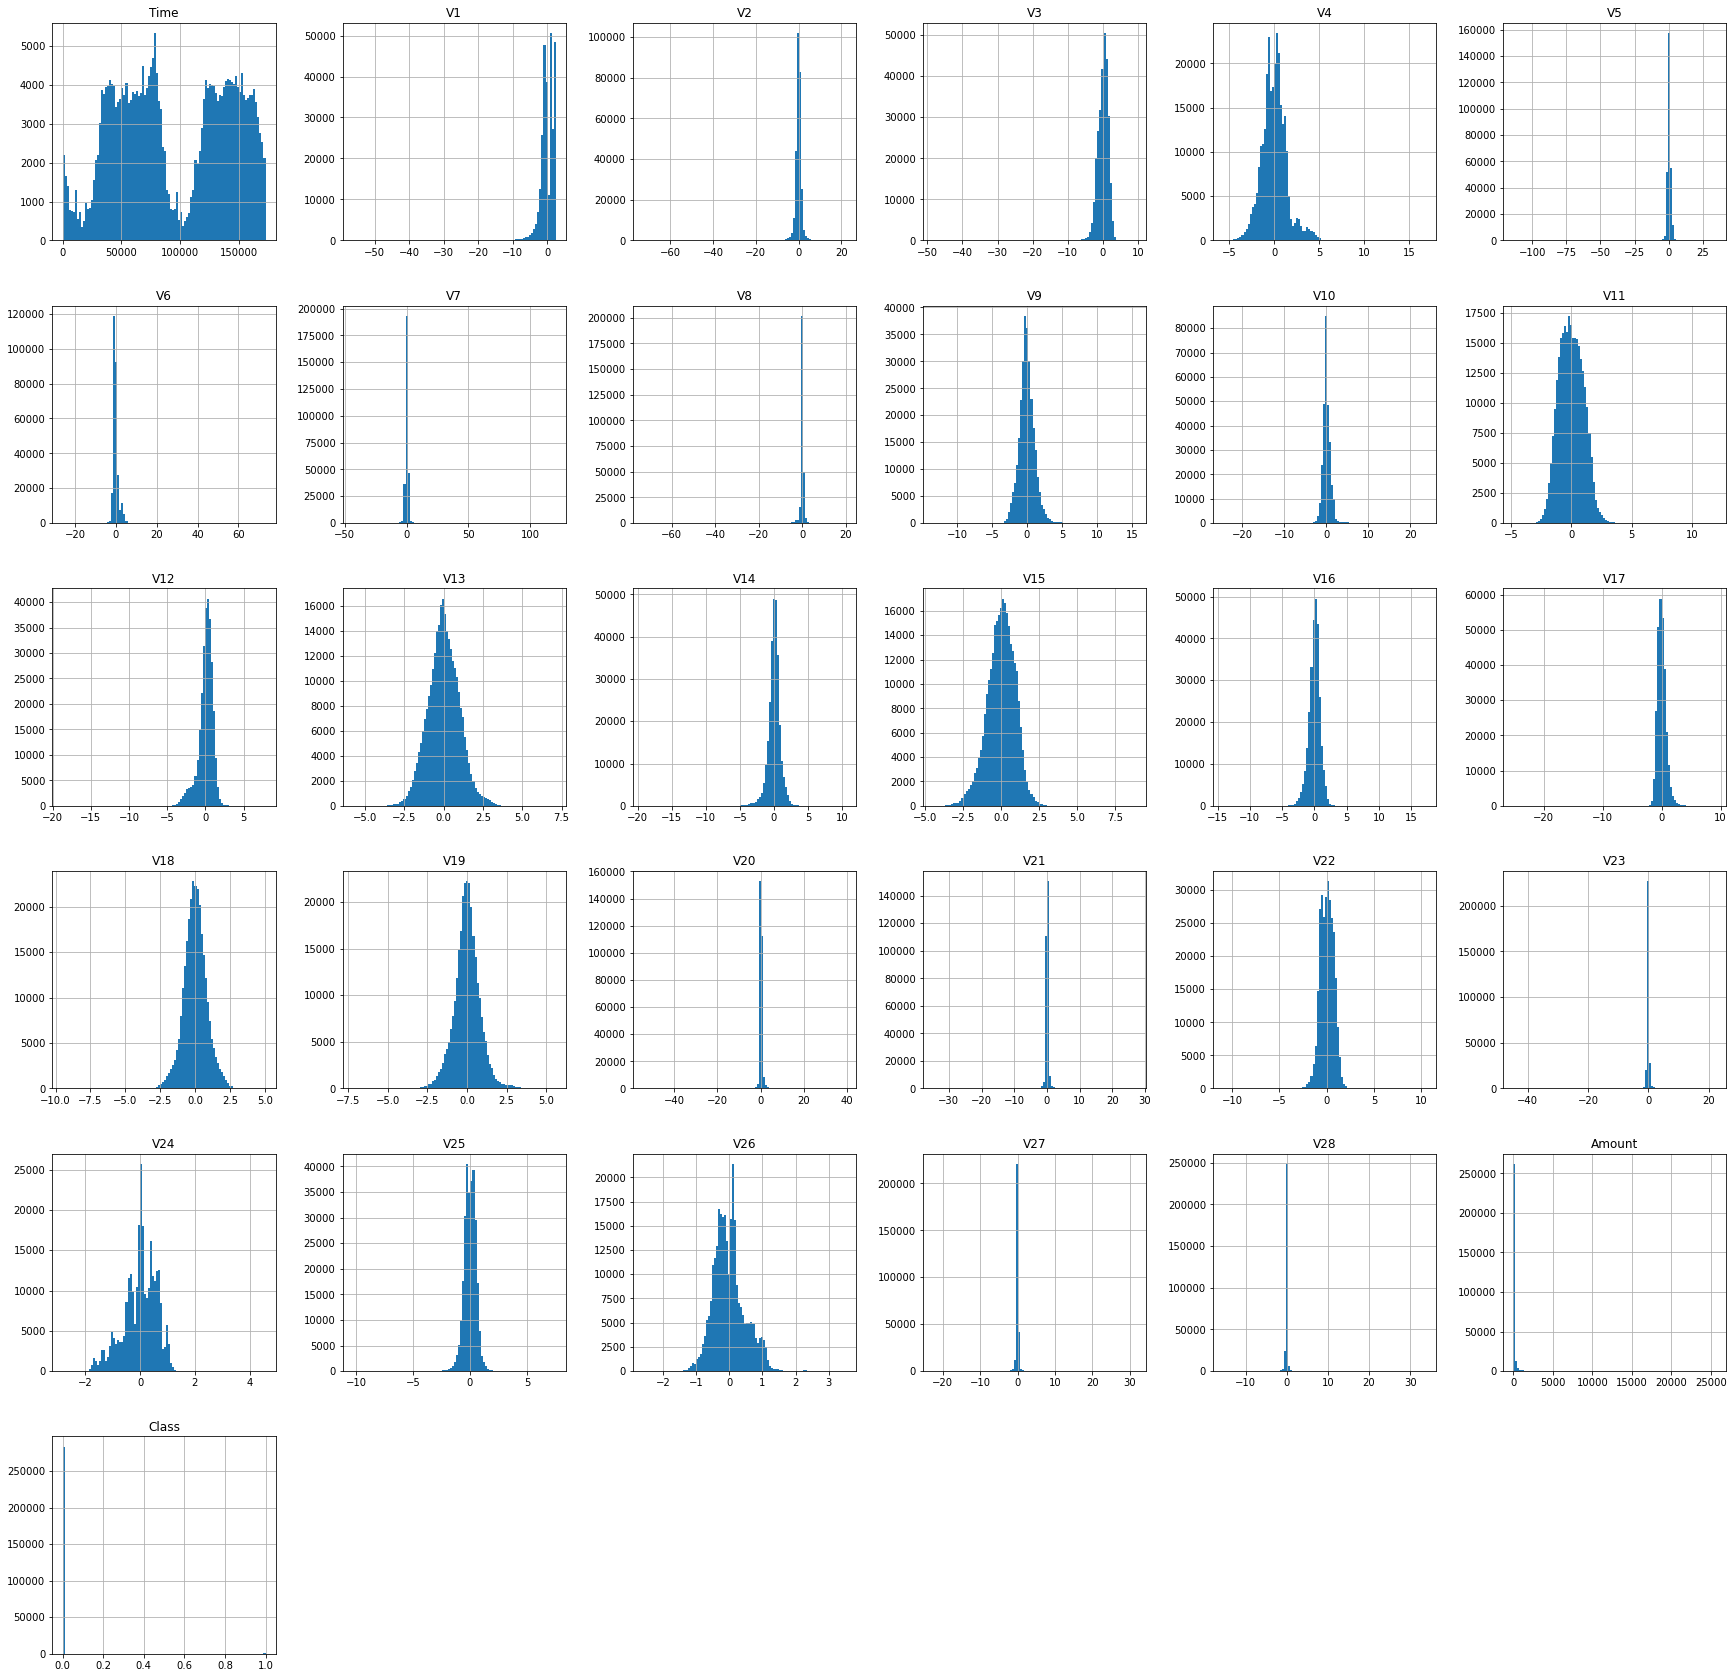

In [55]:
# visualizing the data
data.hist(bins = 100, figsize= (30,30))
plt.show()

V1, V2,...V28 are results of PCA transformation so we will not work with these. The only features which have not been transformed with PCA are 'Time' and 'Amount'. We will also consider the feature 'Class' which is a response variable and it takes value 1 in case of fraud and 0 otherwise.

### 1. Time

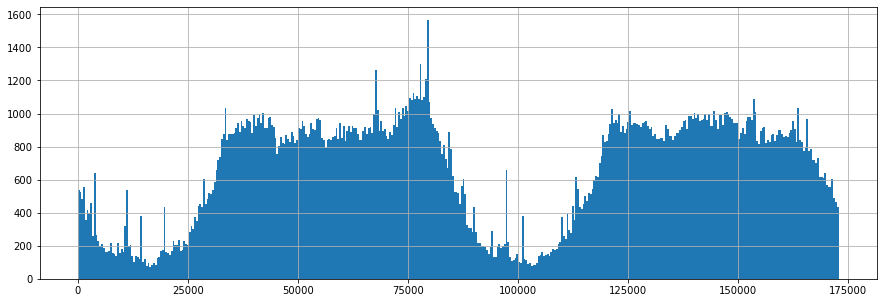

In [56]:
# visualizing the time distribution

data['Time'].hist(bins = 425, figsize = (15,5))
plot1 = plt.show()
plot1

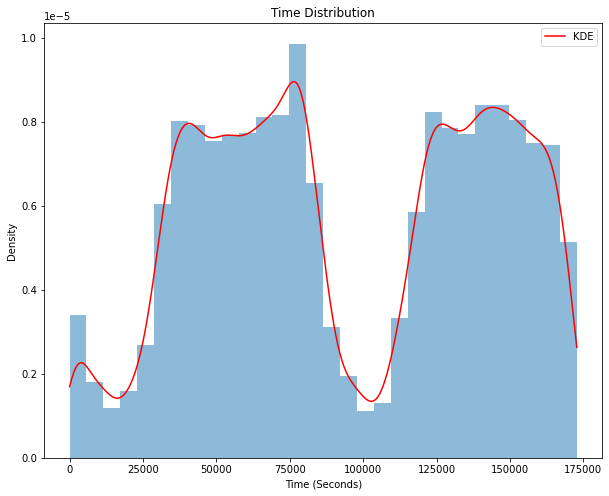

<Figure size 432x288 with 0 Axes>

In [57]:
# visualizing for better understanding

plt.figure(figsize=(10, 8))
plt.title('Time Distribution')

# creating the histogram
plt.hist(data['Time'], color='#1f77b4', bins=30, density=True, alpha=0.5)

# adding a Kernel Density Estimation (KDE) curve using the scipy.stats library
kde = stats.gaussian_kde(data['Time'])
x_vals = np.linspace(min(data['Time']), max(data['Time']), 500)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE')

plt.xlabel('Time (Seconds)')
plt.ylabel('Density')
plt.legend()
plot2= plt.show()

plot2


# Save the plot as PNG file
plt.savefig('time_distribution.png');

**Note**:  We used the Kernal Density Estimation (KDE) which is a which is a non-parametric statistical method, used to estimate the Probability Density Function (PDF) of a continuous random variable. In simpler terms, it's a way to estimate the shape of the underlying data distribution from a set of data points without assuming any specific distribution model (like Gaussian, exponential, etc.).

**Observation**: plot1 clearly shows that there are cycles present. On further analysis in plot2, we found that the 'Time' feature has a bimodal distribution indicating two periods during the day when credit card transactions are more frequent.
The observation from plot2 that there are many timings in credit card transaction that could be helpful for fraud detection.

### 2. Amount

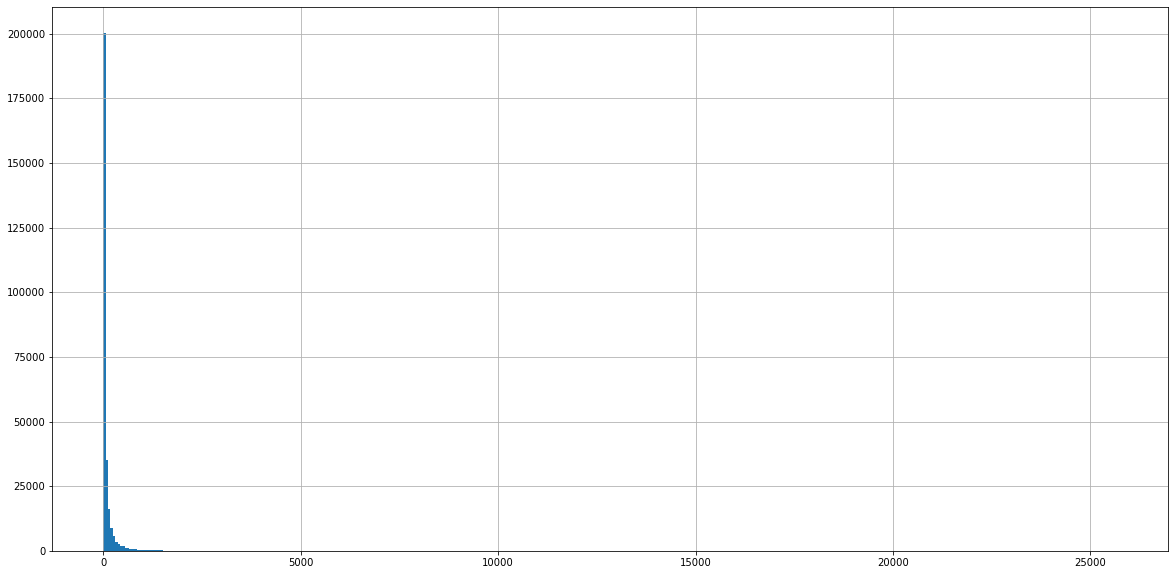

In [73]:
# visualizing the amount distribution

data['Amount'].hist(bins = 425, figsize = (20,10))
plot3 = plt.show()
plot3

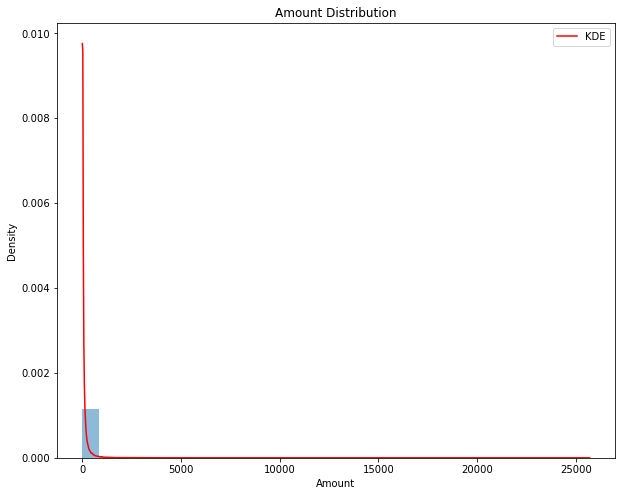

<Figure size 432x288 with 0 Axes>

In [75]:
# visualizing for better analysis

plt.figure(figsize=(10, 8))
plt.title('Amount Distribution')

# creating the histogram
plt.hist(data['Amount'], color='#1f77b4', bins=30, density=True, alpha=0.5)

# adding a Kernel Density Estimation (KDE) curve using the scipy.stats library
kde = stats.gaussian_kde(data['Amount'])
x_vals = np.linspace(min(data['Amount']), max(data['Amount']), 1000)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE')

plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plot4= plt.show()

plot4


# Save the plot as PNG file
plt.savefig('amount_distribution.png');

**Observation**: From plot4, we can see that the distribution is highly skewed on the right side, indicating that the majority of the transactions made were of lower amount. This shows there may be some outliers presents in the transaction which we need to handle while building our fraud detection model.

### 3. Class

In [82]:
# check the counts of '1' i.e., fraud vs '0' i.e., non-fraud
counts = data['Class'].value_counts()
counts

Class
0    283253
1       473
Name: count, dtype: int64

This shows the Class is highly imbalanced. Lets, plot the distribution for clarity

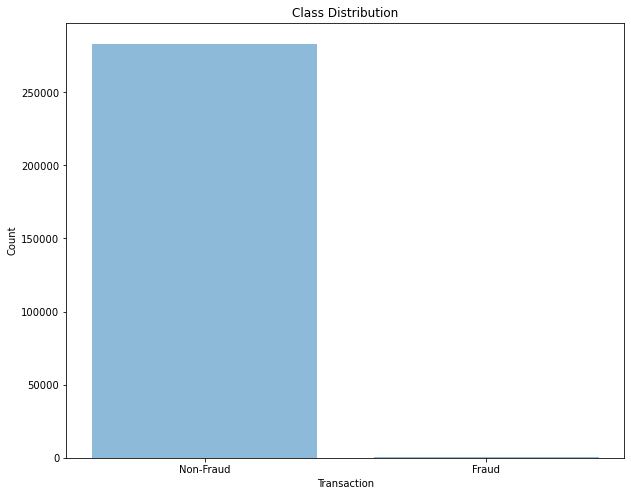

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(10, 8))
plt.title('Class Distribution')

# creating the bar plot
plt.bar(counts.index, counts.values, color='#1f77b4', alpha=0.5)

plt.xlabel('Transaction')
plt.ylabel('Count')

plt.xticks(counts.index, ['Non-Fraud', 'Fraud'])
plot5= plt.show()

plot5


# Save the plot as PNG file
plt.savefig('class_distribution.png')